In [20]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
filename = "Transformers.csv"
url = "https://www.dropbox.com/scl/fi/24nzzwqm7rkhhjaaugeb9/transformer_data1.csv?rlkey=bo3jf4ee5iuhpjlbf339mp46v&st=5j7zu9jw&dl=1"
response = requests.get(url)

# Save the file locally
with open(filename, 'wb') as file:
    file.write(response.content)

In [3]:
csv_file_path = filename  # Replace with the actual path to the produced CSV file
# Load the CSV into a DataFrame and assign it to the desired column names
df = pd.read_csv(csv_file_path)

print(df.columns)

Index(['Filename', 'Batch Size', 'Seq Length', 'Embedding Size', 'Num Layers',
       'Num Heads', 'Depth', 'Accumulated Params', 'Activations-Params',
       'Total Activations', 'Total Parameters', 'Max GPU Memory (MiB)',
       'NonDynamicallyQuantizableLinear Count', 'Linear Count',
       'LayerNorm Count', 'Dropout Count', 'Status'],
      dtype='object')


In [4]:
df.head()

,Filename,Batch Size,Seq Length,Embedding Size,Num Layers,Num Heads,Depth,Accumulated Params,Activations-Params,Total Activations,Total Parameters,Max GPU Memory (MiB),NonDynamicallyQuantizableLinear Count,Linear Count,LayerNorm Count,Dropout Count,Status
0,num_classes:273_embedding_size:128_num_layers:...,64,512,128,8,8,66,71749233,"[('Embedding', 4194304, 70898304), ('Linear', ...",77265,71621233,5217,8,25,16,24,SUCCESSFUL
1,num_classes:570_embedding_size:128_num_layers:...,8,256,128,9,2,74,35277650,"[('Embedding', 262144, 34258688), ('Linear', 1...",46442,35133650,2297,9,28,18,27,SUCCESSFUL
2,num_classes:553_embedding_size:768_num_layers:...,32,512,768,2,8,18,545058855,"[('Embedding', 12582912, 538338816), ('Linear'...",409637,543883815,13503,2,7,4,6,SUCCESSFUL
3,num_classes:688_embedding_size:512_num_layers:...,64,128,512,9,8,74,330316780,"[('Embedding', 4194304, 312577024), ('Linear',...",123176,327971308,10249,9,28,18,27,SUCCESSFUL
4,num_classes:265_embedding_size:1024_num_layers...,8,512,1024,5,8,42,821066087,"[('Embedding', 4194304, 785974272), ('Linear',...",584133,815838567,18163,5,16,10,15,SUCCESSFUL


In [8]:
df['Total_Activations_Batch_Size'] = df['Total Activations'] * df['Batch Size']
df.loc[df['Status'] == 'OOM_CRASH', 'Max GPU Memory (MiB)'] = 42000

df.head()

,Filename,Batch Size,Seq Length,Embedding Size,Num Layers,Num Heads,Depth,Accumulated Params,Activations-Params,Total Activations,Total Parameters,Max GPU Memory (MiB),NonDynamicallyQuantizableLinear Count,Linear Count,LayerNorm Count,Dropout Count,Status,memory_usage_label,Total_Activations_Batch_Size
0,num_classes:273_embedding_size:128_num_layers:...,64,512,128,8,8,66,71749233,"[('Embedding', 4194304, 70898304), ('Linear', ...",77265,71621233,5217,8,25,16,24,SUCCESSFUL,0,4944960
1,num_classes:570_embedding_size:128_num_layers:...,8,256,128,9,2,74,35277650,"[('Embedding', 262144, 34258688), ('Linear', 1...",46442,35133650,2297,9,28,18,27,SUCCESSFUL,0,371536
2,num_classes:553_embedding_size:768_num_layers:...,32,512,768,2,8,18,545058855,"[('Embedding', 12582912, 538338816), ('Linear'...",409637,543883815,13503,2,7,4,6,SUCCESSFUL,1,13108384
3,num_classes:688_embedding_size:512_num_layers:...,64,128,512,9,8,74,330316780,"[('Embedding', 4194304, 312577024), ('Linear',...",123176,327971308,10249,9,28,18,27,SUCCESSFUL,1,7883264
4,num_classes:265_embedding_size:1024_num_layers...,8,512,1024,5,8,42,821066087,"[('Embedding', 4194304, 785974272), ('Linear',...",584133,815838567,18163,5,16,10,15,SUCCESSFUL,2,4673064


In [9]:
bins = [0, 8000, 16000, 24000, 32000, 40000, 50000]
labels = [i for i in range(0, len(bins) - 1)]

# Create the 'memory_usage_label' column
df['memory_usage_label'] = pd.cut(df['Max GPU Memory (MiB)'], bins=bins, labels=labels, right=False)

# Count instances per class
class_counts = df['memory_usage_label'].value_counts()

print(labels, len(labels), "\n", bins)


unique_values = df['memory_usage_label'].unique()

# Print the unique values
print(unique_values, len(labels))

df['memory_usage_label'].values

[0, 1, 2, 3, 4, 5] 6 
 [0, 8000, 16000, 24000, 32000, 40000, 50000]
[0, 1, 2, 3, 4, 5]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5] 6


[0, 0, 1, 1, 2, ..., 1, 5, 1, 0, 1]
Length: 5011
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [10]:
df.head()

,Filename,Batch Size,Seq Length,Embedding Size,Num Layers,Num Heads,Depth,Accumulated Params,Activations-Params,Total Activations,Total Parameters,Max GPU Memory (MiB),NonDynamicallyQuantizableLinear Count,Linear Count,LayerNorm Count,Dropout Count,Status,memory_usage_label,Total_Activations_Batch_Size
0,num_classes:273_embedding_size:128_num_layers:...,64,512,128,8,8,66,71749233,"[('Embedding', 4194304, 70898304), ('Linear', ...",77265,71621233,5217,8,25,16,24,SUCCESSFUL,0,4944960
1,num_classes:570_embedding_size:128_num_layers:...,8,256,128,9,2,74,35277650,"[('Embedding', 262144, 34258688), ('Linear', 1...",46442,35133650,2297,9,28,18,27,SUCCESSFUL,0,371536
2,num_classes:553_embedding_size:768_num_layers:...,32,512,768,2,8,18,545058855,"[('Embedding', 12582912, 538338816), ('Linear'...",409637,543883815,13503,2,7,4,6,SUCCESSFUL,1,13108384
3,num_classes:688_embedding_size:512_num_layers:...,64,128,512,9,8,74,330316780,"[('Embedding', 4194304, 312577024), ('Linear',...",123176,327971308,10249,9,28,18,27,SUCCESSFUL,1,7883264
4,num_classes:265_embedding_size:1024_num_layers...,8,512,1024,5,8,42,821066087,"[('Embedding', 4194304, 785974272), ('Linear',...",584133,815838567,18163,5,16,10,15,SUCCESSFUL,2,4673064


In [11]:
from sklearn.manifold import TSNE

X = df[['Depth','Total Activations', 'Total_Activations_Batch_Size', 'Total Parameters', 'Batch Size', 'Linear Count', 'LayerNorm Count', 'Dropout Count']]  # Input features
y = df['memory_usage_label']  # Actual GPU memory usageplt.show()

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=43)

# Fit and transform the features
tsne_results = tsne.fit_transform(df[['Depth','Total Activations', 'Total_Activations_Batch_Size', 'Total Parameters', 'Batch Size', 'Linear Count', 'LayerNorm Count', 'Dropout Count']])

# Get sorted unique labels
unique_labels = sorted(np.unique(y))

# Assign colors consistently
colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}  # Dict mapping labels to colors

<ipython-input-11-e95caa3174cd>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors


In [12]:
# Get sorted unique labels
unique_labels = sorted(np.unique(y))

# Assign colors consistently
colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}  # Dict mapping labels to colors

<ipython-input-12-b2c23b794113>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors


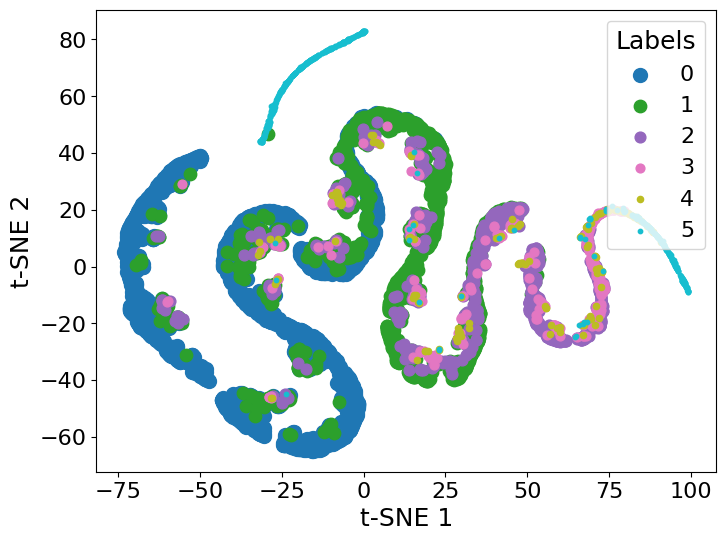

In [14]:
# Apply t-SNE
# tsne_results = TSNE(n_components=2, random_state=42).fit_transform(X_normalized)

# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['label'] = df['memory_usage_label']


# Remove NaNs
# tsne_df = tsne_df.dropna(subset=['label'])


fixed_sizes = [100, 80, 60, 40, 20, 10]

# Assign each label a size in a cyclic manner
cluster_sizes = {label: fixed_sizes[i % len(fixed_sizes)] for i, label in enumerate(unique_labels)}



# Plot the results
plt.figure(figsize=(8, 6))
for label in unique_labels:
    subset = tsne_df[tsne_df['label'] == label]
    plt.scatter(subset['tsne1'], subset['tsne2'], color=label_color_map[label], label=label, s=cluster_sizes[label])

# Labels and legend
plt.xlabel('t-SNE 1', fontsize=18)
plt.ylabel('t-SNE 2', fontsize=18)

plt.xticks(fontsize=16)  # Change X-axis number font size
plt.yticks(fontsize=16)  # Change Y-axis number font size

plt.legend(fontsize=16, title="Labels", title_fontsize=18, loc="best")  # Sorted legend

plt.savefig("TF-sne2d.pdf")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Initialize the t-SNE model with 3 components
tsne = TSNE(n_components=3, random_state=43)


# Fit and transform the features

tsne_results = tsne.fit_transform(df[['Depth', 'Total Activations', 'Total Parameters', 'Batch Size',
                      'NonDynamicallyQuantizableLinear Count', 'Linear Count',
                      'LayerNorm Count', 'Dropout Count']])

# Create a new DataFrame for the t-SNE results (3 components)
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
tsne_df['label'] = df['memory_usage_label']

<ipython-input-16-4b19ff4a197b>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors


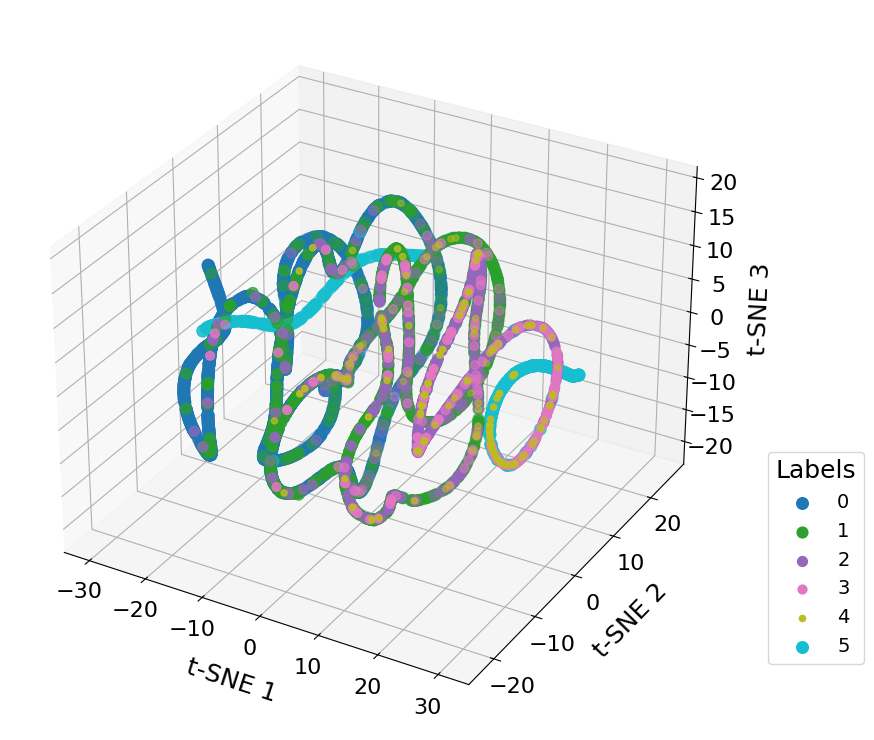

In [16]:
# --- Prepare DataFrame ---
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
tsne_df['label'] = y

# --- Visual Styling ---
unique_labels = sorted(tsne_df['label'].unique())
colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}
fixed_sizes = [70, 60, 50, 40, 20]
cluster_sizes = {label: fixed_sizes[i % len(fixed_sizes)] for i, label in enumerate(unique_labels)}

# --- Plot ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    subset = tsne_df[tsne_df['label'] == label]
    ax.scatter(subset['tsne1'], subset['tsne2'], subset['tsne3'],
               color=label_color_map[label],
               label=str(label),
               s=cluster_sizes[label])

# Axis labels
ax.set_xlabel('t-SNE 1', fontsize=18, labelpad=12)
ax.set_ylabel('t-SNE 2', fontsize=18, labelpad=12)
ax.set_zlabel('t-SNE 3', fontsize=18, labelpad=10)

# Tick font sizes
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='z', labelsize=16)

# Legend styling
ax.legend(title="Labels", fontsize=14, title_fontsize=18, loc='upper right', bbox_to_anchor=(1.2, 0.4))

# Layout adjustment
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)

# Export or display
# plt.savefig("MLP_tsne_3d.pdf")
plt.show()

<ipython-input-23-83da93417bb9>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors


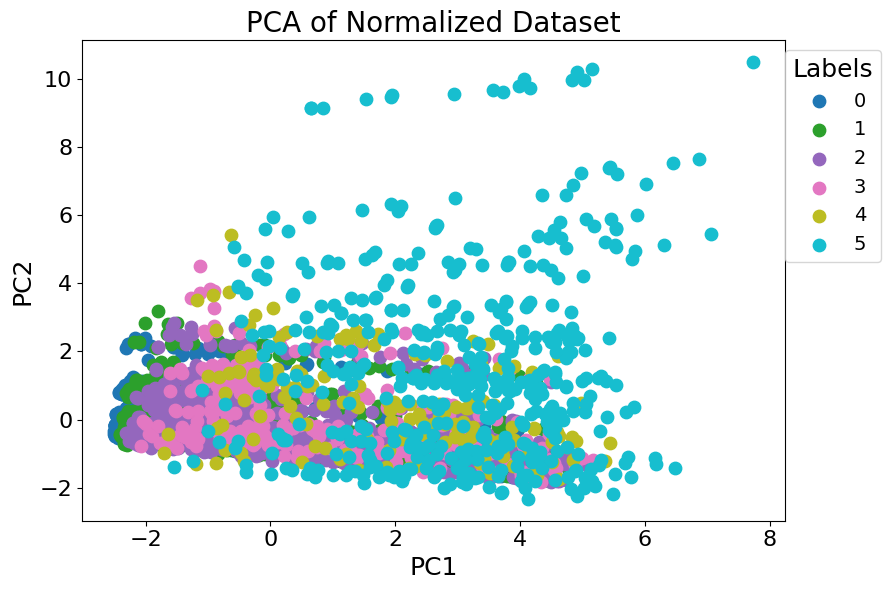

In [23]:

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
pca1, pca2 = X_pca[:, 0], X_pca[:, 1]

# Unique labels and consistent color mapping
unique_labels = sorted(np.unique(y))
colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# Create figure
plt.figure(figsize=(9, 6))

# Plot each label with fixed color
for label in unique_labels:
    mask = y == label
    plt.scatter(pca1[mask], pca2[mask], color=label_color_map[label], label=str(label), s=80)

# Set labels and title
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
plt.title('PCA of Normalized Dataset', fontsize=20)

# Axis ticks styling
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Legend styling
plt.legend(title="Labels", fontsize=14, title_fontsize=18, loc='upper right', bbox_to_anchor=(1.15, 1))

# Adjust layout and save
plt.tight_layout()
# plt.savefig("MLP_first_phase_pca_2d.pdf")
plt.show()

<ipython-input-24-fbbaed890bca>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors


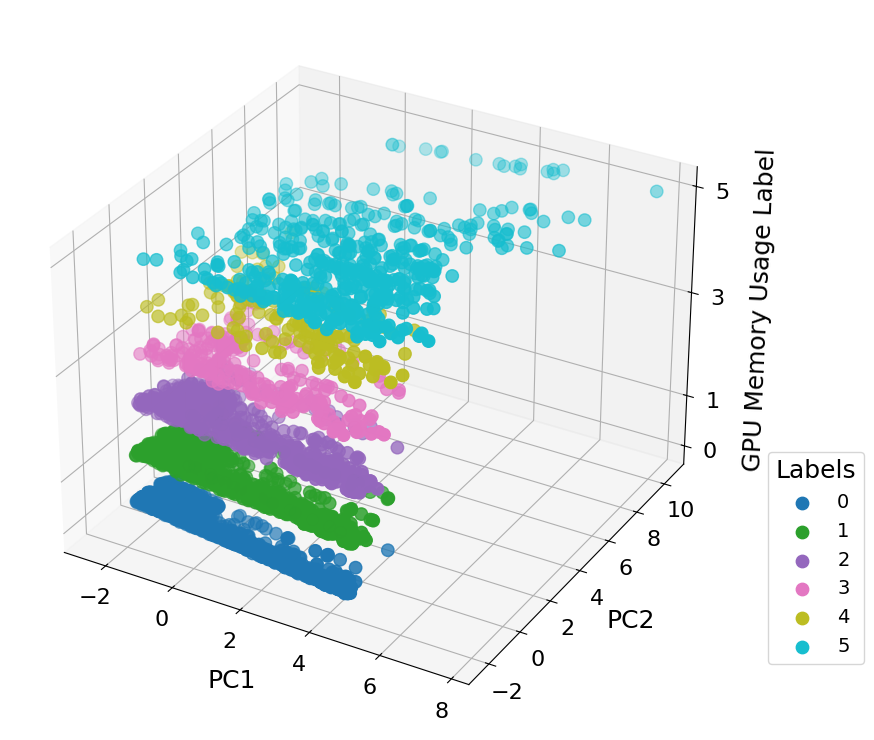

In [24]:
import matplotlib.ticker as ticker

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Extract PCA components
pca1, pca2 = X_pca[:, 0], X_pca[:, 1]

# Ensure Z-axis starts with an even number and has exactly 4 steps
y_min, y_max = int(np.min(y)), int(np.max(y))
y_min = y_min + (y_min % 2)  # Ensure even start

# Generate exactly 4 even integer steps for Z-axis
int_ticks = np.linspace(start=y_min, stop=y_max, num=4, dtype=int)
int_ticks = np.unique(int_ticks)  # Avoid duplicate ticks

# Create figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Assign colors consistently
unique_labels = sorted(np.unique(y))
colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# Plot each cluster with a fixed color (ONLY on Z-axis)
for label in unique_labels:
    mask = y == label
    ax.scatter(pca1[mask], pca2[mask], y[mask], color=label_color_map[label], label=str(label), s=80)

# Set labels and title
ax.set_xlabel(f'PC1', fontsize=18, labelpad=12)
ax.set_ylabel(f'PC2', fontsize=18, labelpad=12)
ax.set_zlabel('GPU Memory Usage Label', fontsize=18, labelpad=10)

# Increase tick label size (X, Y, and Z axis numbers)
ax.tick_params(axis='x', labelsize=16)  # Change X-axis number font size
ax.tick_params(axis='y', labelsize=16)  # Change Y-axis number font size
ax.tick_params(axis='z', labelsize=16)  # Change Z-axis number font size

# Set only 4 even numbers on the Z-axis
ax.set_zticks(int_ticks)
ax.zaxis.set_major_locator(ticker.FixedLocator(int_ticks))  # Ensure only these ticks appear

# Adjust legend position
ax.legend(title="Labels", fontsize=14, loc='upper right', title_fontsize=18, bbox_to_anchor=(1.2, 0.4))

plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)  # Adjust layout

# plt.savefig("MLP_first_phase_pca_3d.pdf")